Praktikum Digitale Signalverarbeitung
=====================================

**Author:** Johann-Markus Batke

**Date:** <2024-05-21 Di>



PROPERTY: header-args:jupyter-python  :session /jpy::494409c787441881e238f8133f5c6c3748ca352a1ab08d68 :kernel p310



## Einleitung



Bilder lassen sich wie Audiosignale digital darstellen. Während Audiosignale eindimensionale Zeitsignale sind, stellen Bilder ein zweidimensionales Signal dar (in zeitlicher Abfolge als Film ebenfalls ein Zeitsignal). Dieser Versuch soll den Umgang mit digitalen Bilddaten grundlegend darstellen. 



## Vorbereitung



Bringen Sie ein Bild bzw. eine Bilddatei Ihrer Wahl zum Praktikumstermin mit. Mit dieser Bilddatei sollen alle Verarbeitungsschritte des Versuchs nachvollzogen und die Aufgabe zum Schluss gelöst werden.



## Versuchsdurchführung



Numerical Python und Matplotlib laden:



In [1]:
import numpy as np
import matplotlib.pyplot as plt

Zur Demonstration der Programmbeispiele müssen wir ein Beispielbild laden:



In [9]:
from scipy import misc
f = misc.face()

C:\Users\Sonni\AppData\Local\Temp\ipykernel_15100\1346554487.py:2: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  f = misc.face()


### Bilddaten lesen und schreiben



Nachfolgend wird das Modul `imagio` verwendet.

Das Speichern von Bildern erfolgt durch



In [3]:
import imageio.v3 as iio
iio.imwrite('face.png', f) # uses the Image module (PIL)

Das Lesen von Bildern erfolgt durch



In [4]:
im_MN = iio.imread('face.png')

**Fragen**

1.  Welche Ausgabe ergibt das Attribut `shape` für die Bildvariable `im_MN`?
2.  Welche Bedeutung haben die Zahlen?



### Schwellwert



Die Farbdarstellung erfolgt mit dem Datentyp `uint8`. Alle Farbwerte unterhalb eines Schwellwerts $S$ sollen null gesetzt werden. Zum Vergleich der Bilder sollen die Bilddaten kopiert werden.



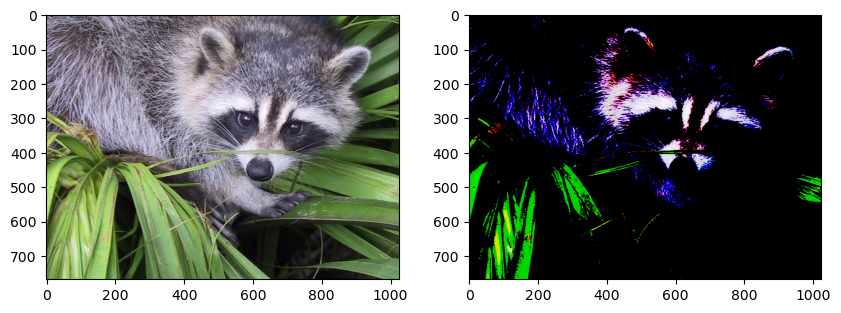

In [5]:
jm_MN = np.copy(im_MN)
jm_MN[im_MN < 200] = 0

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(im_MN)
ax[1].imshow(jm_MN)

**Frage**
Bei welchem Schwellwert ist die Mitte des Wertebereichs erreicht?



### Faltung



Die Faltung zweier Bilder erfolgt zweidimensional. Dafür steht das Modul `ndimage` zur Verfügung. Im Beispielprogramm wird mit der quadratischen Matrix `mean_LL` gefaltet.



NameError: name 'f_NN' is not defined

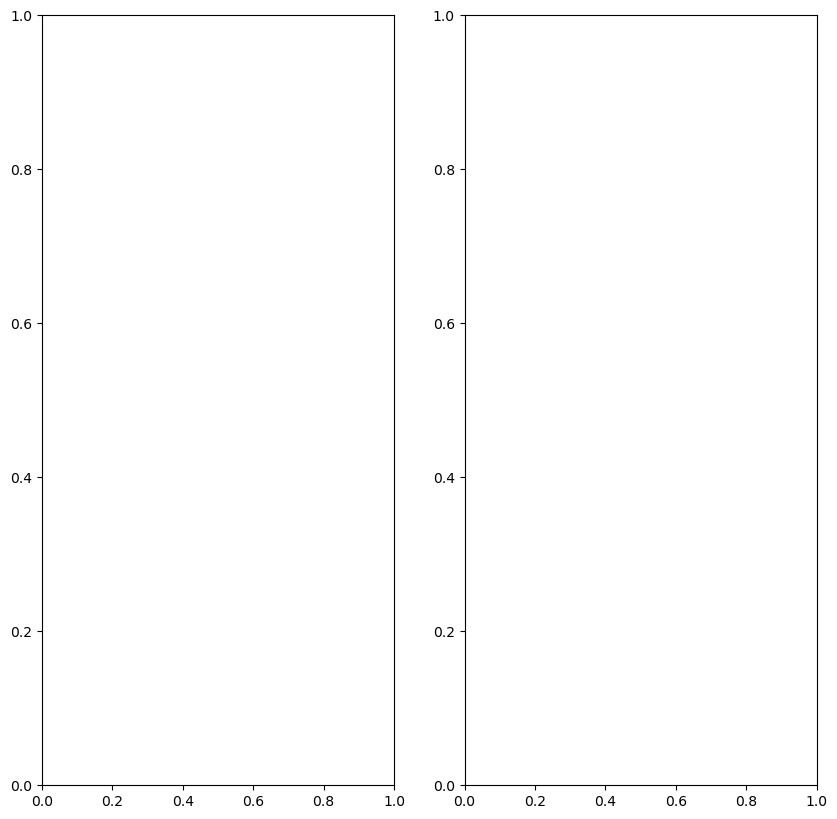

In [6]:
import scipy.ndimage as ndimage
L = 5
mean_LL = np.ones([L, L])/L**2

fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(f_NN)
ax[1].imshow(ndimage.convolve(f_NN, mean_LL))

**Frage**
Welche Wirkung hat die Faltung?



### FFT



Die FFT wird zweidimensional berechnet per `fft2`. Der Gleichanteil im Ergebnis der Berechnunst steht in Korrdinate $(0,0)$. Der Befehl `fftshift` schiebt die Frequenz Null in die Mitte des Bildes.



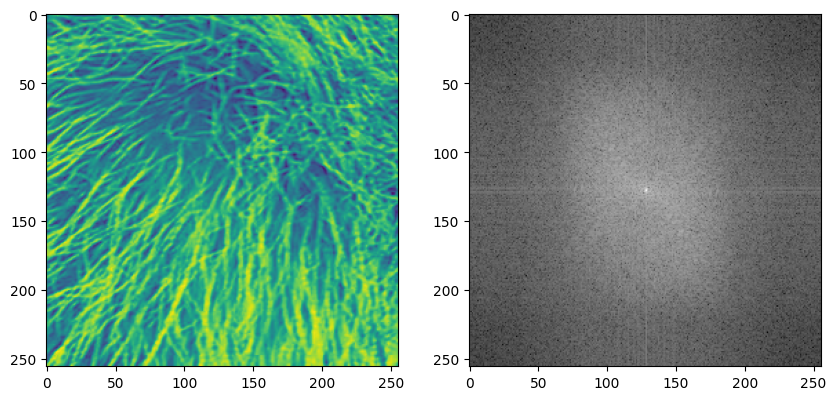

In [ ]:
N = 256
f_NN = im_MN[:N, :N, 0]
F_NN = np.fft.fft2(f_NN)
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(f_NN)
ax[1].imshow(20*np.log(np.abs(np.fft.fftshift(F_NN))), cmap='gray')

**Aufgabe** 
Berechnen Sie das Ergebnis der Faltung per FFT!

